In [7]:
# Groq API Configuration

import os 
from dotenv import load_dotenv
load_dotenv()

GROQ_API_KEY = os.getenv("GROQ_API_KEY")

#### Load the model

In [12]:
from langchain_groq import ChatGroq

model="deepseek-r1-distill-llama-70b"
llm= ChatGroq(model=model)

In [13]:
llm.invoke("Hi")

AIMessage(content='<think>\n\n</think>\n\nHello! How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 4, 'total_tokens': 20, 'completion_time': 0.074164628, 'prompt_time': 5.6739e-05, 'queue_time': 0.053678621, 'total_time': 0.074221367}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--3a3e522f-7240-4cd6-9809-1ba3ac92f692-0', usage_metadata={'input_tokens': 4, 'output_tokens': 16, 'total_tokens': 20})

In [14]:
llm.invoke("Hi").content

'<think>\n\n</think>\n\nHello! How can I assist you today?'

In [15]:
print(llm.invoke("Hi").content)

<think>

</think>

Hello! How can I assist you today?


#### import all module

In [123]:
from langchain_core.tools import tool
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph, MessagesState, START, END
from langgraph.prebuilt import ToolNode

In [23]:
def call_model(state: MessagesState):
    messages = state['messages']
    response = llm.invoke(messages)
    return {"messages": [response]}

In [29]:
# messages passes as string
HumanMessage("Hi, How are you?")

HumanMessage(content='Hi, How are you?', additional_kwargs={}, response_metadata={})

In [43]:
# messages passes as list

HumanMessage(["Hi, How are you?"])

HumanMessage(content=['Hi, How are you?'], additional_kwargs={}, response_metadata={})

#### This code is only for the testing

In [44]:
state= {"messages": ["Hi, How are you?"]}
state

{'messages': ['Hi, How are you?']}

In [45]:
call_model(state)

{'messages': [AIMessage(content="<think>\n\n</think>\n\nHi! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are you doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 9, 'total_tokens': 51, 'completion_time': 0.216688977, 'prompt_time': 0.000387163, 'queue_time': 0.057833896999999995, 'total_time': 0.21707614}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--1d905b43-8049-413c-8788-69c49d76a57a-0', usage_metadata={'input_tokens': 9, 'output_tokens': 42, 'total_tokens': 51})]}

In [40]:
# from langchain_core.messages import AnyMessage
# # class MessagesState(TypedDict):
# #     messages: Annotated[list[AnyMessage], add_messages]


# class AgentState(TypedDict):
#     messages: Annotated[Sequence[BaseMessage], operator.add]

In [63]:
from langgraph.graph import StateGraph, MessagesState, START, END

In [82]:
workflow= StateGraph(MessagesState)

In [83]:
workflow.add_node("mybot", call_model)

In [86]:
workflow.add_edge(START, "mybot")

In [87]:
workflow.add_edge("mybot", END)

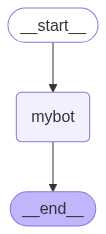

In [88]:
workflow.compile()

In [89]:
app= workflow.compile()

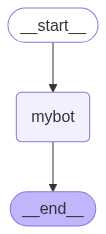

In [91]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [93]:
input= {"messages": ["Hi, How are you?"]}

In [94]:
app.invoke(input)

{'messages': [HumanMessage(content='Hi, How are you?', additional_kwargs={}, response_metadata={}, id='c570a6ca-6668-4122-a20e-5f80588006ac'),
  AIMessage(content="<think>\n\n</think>\n\nHi! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are you doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 9, 'total_tokens': 51, 'completion_time': 0.196257664, 'prompt_time': 0.000189157, 'queue_time': 0.056589982999999996, 'total_time': 0.196446821}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--ea66d843-8878-4d67-a2cd-2146513e1fda-0', usage_metadata={'input_tokens': 9, 'output_tokens': 42, 'total_tokens': 51})]}

In [105]:
for output in app.stream(input):
    for key, value in output.items():
        print(f"Output from {key} Node")
        print("___________")
        print(value)

Output from mybot Node
___________
{'messages': [AIMessage(content="<think>\n\n</think>\n\nHi! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are *you* doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 9, 'total_tokens': 53, 'completion_time': 0.208920032, 'prompt_time': 0.000522312, 'queue_time': 0.055930538, 'total_time': 0.209442344}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--36595e09-7927-4dfc-a9f9-d8a1c36f44b9-0', usage_metadata={'input_tokens': 9, 'output_tokens': 44, 'total_tokens': 53})]}


In [100]:
for output in app.stream(input):
    for key,value in output.items():
        print(f"Output from {key} Node")
        print("_______")
        print(value)
        print("\n")

Output from mybot Node
_______
{'messages': [AIMessage(content="<think>\n\n</think>\n\nHi! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are you doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 9, 'total_tokens': 51, 'completion_time': 0.204652875, 'prompt_time': 0.000214887, 'queue_time': 0.057381708000000003, 'total_time': 0.204867762}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--fb6d1710-1505-4278-a227-5414707ec7a4-0', usage_metadata={'input_tokens': 9, 'output_tokens': 42, 'total_tokens': 51})]}




In [95]:
app.invoke({"messages": ["What is AgenticAI?"]})

{'messages': [HumanMessage(content='What is AgenticAI?', additional_kwargs={}, response_metadata={}, id='372df89a-76f4-41f9-85e1-b18b24b152e7'),
  AIMessage(content="<think>\n\n</think>\n\nAgenticAI is a company that specializes in developing AI-driven solutions to help organizations manage and optimize their supply chains. The company uses advanced algorithms and machine learning techniques to provide predictive analytics, demand forecasting, and inventory optimization. AgenticAI's platform is designed to help businesses make data-driven decisions, reduce costs, and improve operational efficiency.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 72, 'prompt_tokens': 9, 'total_tokens': 81, 'completion_time': 0.326203122, 'prompt_time': 0.001403236, 'queue_time': 0.056493324, 'total_time': 0.327606358}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--f3cced25-5378-4c

#### This is a workflow with tool calling

In [106]:
@tool
def search(query:str):
    """This is my custom tool for searching a weather"""
    if "delhi" in query.lower():
        return "the temp is 45 degree and sunny"
    return "the temp is 25 degree and cloudy"

In [113]:
search

StructuredTool(name='search', description='This is my custom tool for searching a weather', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x0000027D434FA700>)

In [114]:
search.name

'search'

In [115]:
search.description

'This is my custom tool for searching a weather'

In [118]:
search.args

{'query': {'title': 'Query', 'type': 'string'}}

#### Testing a tool

In [108]:
search.invoke("what is a tempurature in kashmir?")

'the temp is 25 degree and cloudy'

In [109]:
search.invoke("what is a tempurature in delhi?")

'the temp is 45 degree and sunny'

In [119]:
llm.invoke("what is a tempurature in delhi?")

AIMessage(content='<think>\n\n</think>\n\nAs of my last update in July 2024, I cannot provide real-time temperature data. However, you can easily check the current temperature in Delhi using reliable weather websites, apps, or services like:\n\n- **AccuWeather**  \n- **Weather.com**  \n- **The Weather Channel**  \n- **Google Weather** (search "temperature in Delhi" on Google)  \n\nFor the most accurate and up-to-date information, enable location services on your device or search for Delhi specifically. Let me know if you\'d like help with anything else!', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 116, 'prompt_tokens': 13, 'total_tokens': 129, 'completion_time': 0.447504819, 'prompt_time': 0.000421683, 'queue_time': 0.057553932, 'total_time': 0.447926502}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--54d28c3a-9227-43b4-b637-5acd3e9fb0fa-0', usage_metadata={'i

#### Binding a tool to the LLM
**Special Note:** use some good for agentic workflow model, since opensource model might not give you the correct output

In [124]:
tools= [search]

In [127]:
llm_with_tool= llm.bind_tools(tools)

In [133]:
print(llm.invoke("what is a tempurature in delhi?").content)

<think>

</think>

As of my last update in July 2024, I cannot provide real-time weather information. To find the current temperature in Delhi, you can check a reliable weather website, app, or service like Weather.com, AccuWeather, or the Indian Meteorological Department's official website. Let me know if you'd like help with anything else!


#### Testig my llm_with_tool

In [134]:
response= llm_with_tool.invoke("what is a tempurature in delhi?")

In [135]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'cbq0hham7', 'function': {'arguments': '{"query":"temperature in Delhi"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 87, 'prompt_tokens': 135, 'total_tokens': 222, 'completion_time': 0.382207095, 'prompt_time': 0.008702728, 'queue_time': 0.056279907, 'total_time': 0.390909823}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--8bc303e1-872b-44f9-bf15-e0017ccefb3f-0', tool_calls=[{'name': 'search', 'args': {'query': 'temperature in Delhi'}, 'id': 'cbq0hham7', 'type': 'tool_call'}], usage_metadata={'input_tokens': 135, 'output_tokens': 87, 'total_tokens': 222})

In [130]:
response.content

''

In [136]:
response.tool_calls

[{'name': 'search',
  'args': {'query': 'temperature in Delhi'},
  'id': 'cbq0hham7',
  'type': 'tool_call'}]

In [147]:
def call_model(state: MessagesState):
    messages = state['messages']
    response = llm_with_tool.invoke(messages)
    return {"messages": [response]}

#### Testing Code

In [148]:
input= {"messages": ["what is a weather in delhi?"]}

In [149]:
call_model(input)

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'sb6gz6hfv', 'function': {'arguments': '{"query":"weather in Delhi"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 64, 'prompt_tokens': 133, 'total_tokens': 197, 'completion_time': 0.310037773, 'prompt_time': 0.008570407, 'queue_time': 0.053796832999999995, 'total_time': 0.31860818}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--853253af-448c-4d9b-aeaa-5c7907b8a843-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in Delhi'}, 'id': 'sb6gz6hfv', 'type': 'tool_call'}], usage_metadata={'input_tokens': 133, 'output_tokens': 64, 'total_tokens': 197})]}

In [150]:
response= call_model(input)

In [151]:
response["messages"][-1].content

''

In [152]:
response["messages"][-1].tool_calls

[{'name': 'search',
  'args': {'query': 'Delhi weather'},
  'id': 'chszaq8rp',
  'type': 'tool_call'}]

#### Here my router function

Now whatever will come from call_model router funtion will redirect this to the appropriate tool

In [155]:
def router_function(state: MessagesState):
    messages= state["messages"]
    last_message= messages[-1]
    if last_message.tool_calls:
        return "tools"
    return END

In [156]:
tools

[StructuredTool(name='search', description='This is my custom tool for searching a weather', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x0000027D434FA700>)]

#### Converting tools to Node

In [159]:
from langgraph.prebuilt import ToolNode

tool_node= ToolNode(tools)

In [160]:
tool_node

tools(tags=None, recurse=True, explode_args=False, func_accepts_config=True, func_accepts={'store': ('__pregel_store', None)}, tools_by_name={'search': StructuredTool(name='search', description='This is my custom tool for searching a weather', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x0000027D434FA700>)}, tool_to_state_args={'search': {}}, tool_to_store_arg={'search': None}, handle_tool_errors=True, messages_key='messages')

In [161]:
from langgraph.graph import StateGraph, MessagesState, START, END

In [174]:
workflow2= StateGraph(MessagesState)

In [175]:
workflow2.add_node("llmwithtool", call_model)

In [176]:
workflow2.add_node("mytools", tool_node)

In [177]:
workflow2.add_edge(START, "llmwithtool")

In [178]:
workflow2.add_conditional_edges(
    "llmwithtool",
    router_function,
    {
        "tools": "mytools",
        END: END
    }
)

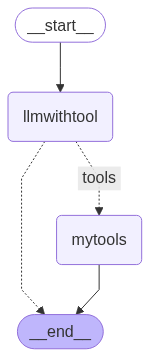

In [179]:
workflow2.compile()

In [190]:
app2= workflow2.compile()

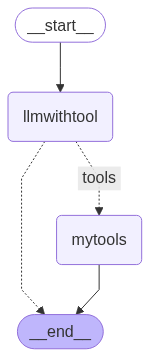

In [195]:
from IPython.display import Image, display

display(Image(app2.get_graph().draw_mermaid_png()))

In [196]:
app2.invoke({"messages": ["what is a weather in bengraluru?"]})

{'messages': [HumanMessage(content='what is a weather in bengraluru?', additional_kwargs={}, response_metadata={}, id='bcff9e1d-a946-4ae2-b6c4-5425750c2926'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '20d5vyqf5', 'function': {'arguments': '{"query":"Bengaluru weather"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 71, 'prompt_tokens': 135, 'total_tokens': 206, 'completion_time': 0.295431159, 'prompt_time': 0.008688254, 'queue_time': 0.059123519000000006, 'total_time': 0.304119413}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--7c3a01c2-3bf5-42c4-bdc1-654103fcc156-0', tool_calls=[{'name': 'search', 'args': {'query': 'Bengaluru weather'}, 'id': '20d5vyqf5', 'type': 'tool_call'}], usage_metadata={'input_tokens': 135, 'output_tokens': 71, 'total_tokens': 206}),
  ToolMessage(content='the temp is 25 degree and cloudy

In [198]:
response= app2.invoke({"messages": ["what is a weather in bengraluru?"]})
response["messages"][-1]

ToolMessage(content='the temp is 25 degree and cloudy', name='search', id='66adc024-b66d-496f-9c4c-4d90c9559fed', tool_call_id='r591v9rye')

In [199]:
response["messages"][-1].content

'the temp is 25 degree and cloudy'

In [200]:
app2.invoke({"messages":["what is a weather in delhi?"]})

{'messages': [HumanMessage(content='what is a weather in delhi?', additional_kwargs={}, response_metadata={}, id='f4f9cc7d-3393-48fa-91d4-a04cca183522'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'szmzxf36x', 'function': {'arguments': '{"query":"weather in Delhi"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 107, 'prompt_tokens': 133, 'total_tokens': 240, 'completion_time': 0.441092534, 'prompt_time': 0.008566867, 'queue_time': 0.056393256999999995, 'total_time': 0.449659401}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--7fda8efa-ede5-478d-84c9-e418080ba8c1-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in Delhi'}, 'id': 'szmzxf36x', 'type': 'tool_call'}], usage_metadata={'input_tokens': 133, 'output_tokens': 107, 'total_tokens': 240}),
  ToolMessage(content='the temp is 45 degree and sunny', nam

In [201]:
response= app2.invoke({"messages":["what is a weather in delhi?"]})
response["messages"][-1].content

'the temp is 45 degree and sunny'

In [204]:
response["messages"][0]

HumanMessage(content='what is a weather in delhi?', additional_kwargs={}, response_metadata={}, id='690ea3c0-7d18-4baf-99e5-e8a87f89c0a3')

In [205]:
response["messages"][1]

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'wt0s999qn', 'function': {'arguments': '{"query":"weather in Delhi"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 94, 'prompt_tokens': 133, 'total_tokens': 227, 'completion_time': 0.405395487, 'prompt_time': 0.008572307, 'queue_time': 0.053738957, 'total_time': 0.413967794}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--1db97253-d3ae-459c-9fc0-64058da97c6c-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in Delhi'}, 'id': 'wt0s999qn', 'type': 'tool_call'}], usage_metadata={'input_tokens': 133, 'output_tokens': 94, 'total_tokens': 227})

In [206]:
#### Use good resoning based model

In [209]:
app2.invoke({"messages": ["Hi, how are you?"]})

{'messages': [HumanMessage(content='Hi, how are you?', additional_kwargs={}, response_metadata={}, id='4c2870d3-d7f7-4012-be92-0cf9bf88082c'),
  AIMessage(content="Hello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you. How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 98, 'prompt_tokens': 131, 'total_tokens': 229, 'completion_time': 0.457745967, 'prompt_time': 0.008457969, 'queue_time': 0.05627093100000001, 'total_time': 0.466203936}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--46481609-c866-4493-8d6f-8051061b24f4-0', usage_metadata={'input_tokens': 131, 'output_tokens': 98, 'total_tokens': 229})]}

In [210]:
response= app2.invoke({"messages": ["Hi, how are you?"]})

In [211]:
response["messages"][-1]

AIMessage(content="Hello! How can I assist you today? If you're looking for weather information, could you please let me know the location you're interested in?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 404, 'prompt_tokens': 131, 'total_tokens': 535, 'completion_time': 1.7942621650000001, 'prompt_time': 0.00845468, 'queue_time': 0.05635652, 'total_time': 1.802716845}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--726cd96d-9275-44af-9226-b98d94847697-0', usage_metadata={'input_tokens': 131, 'output_tokens': 404, 'total_tokens': 535})

In [212]:
response= app2.invoke({"messages": ["What is agentic AI"]})

In [213]:
response["messages"][-1].content

'Agentic AI refers to artificial intelligence systems that possess autonomy, the ability to act independently and make decisions based on their environment, goals, and interactions. These systems can perform tasks without explicit human instruction, adapting their behavior to achieve specific objectives. Agentic AI integrates various AI technologies, including machine learning, natural language processing, and decision-making algorithms, to enable proactive and interactive capabilities. It has applications in robotics, autonomous vehicles, smart systems, and personalized assistants, but also raises important considerations around ethics, safety, and control.'

In [214]:
response= app2.invoke({"messages": ["What is the weather of sikkim"]})

In [215]:
response["messages"][-1].content

'the temp is 25 degree and cloudy'

In [216]:
workflow2.add_edge("mytools", "llmwithtool")

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


In [217]:
app3= workflow2.compile()

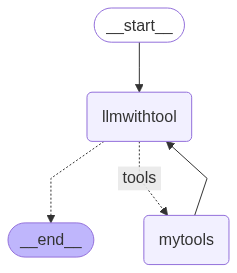

In [220]:
from IPython.display import display, Image

display(Image(app3.get_graph().draw_mermaid_png()))

In [224]:
for output in app3.stream({"messages": ["what is a weather in new delhi?"]}):
    for key,value in output.items():
        print(f"her is output from {key} node")
        print("________")
        print(value)
        print("\n")

her is output from llmwithtool node
________
{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'q26xar5mt', 'function': {'arguments': '{"query":"weather in New Delhi"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 110, 'prompt_tokens': 134, 'total_tokens': 244, 'completion_time': 0.538183051, 'prompt_time': 0.00860927, 'queue_time': 0.056222549999999996, 'total_time': 0.546792321}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--29017232-3c0d-4abd-ae99-89bdca26b4ee-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in New Delhi'}, 'id': 'q26xar5mt', 'type': 'tool_call'}], usage_metadata={'input_tokens': 134, 'output_tokens': 110, 'total_tokens': 244})]}


her is output from mytools node
________
{'messages': [ToolMessage(content='the temp is 45 degree and sunny', name='search', id='22811ac3-63c1-4f43

In [225]:
for output in app3.stream({"messages": ["what is a weather in delhi can you tell me some good hotel for staying in north delhi"]}):
    for key,value in output.items():
        print(f"her is output from {key} node")
        print("________")
        print(value)
        print("\n")

her is output from llmwithtool node
________
{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '33cydazm9', 'function': {'arguments': '{"query":"weather in Delhi"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 876, 'prompt_tokens': 145, 'total_tokens': 1021, 'completion_time': 3.924284619, 'prompt_time': 0.009856906, 'queue_time': 0.053941008, 'total_time': 3.9341415250000003}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--b0821d4c-33e4-45c4-93f9-6167ac520543-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in Delhi'}, 'id': '33cydazm9', 'type': 'tool_call'}], usage_metadata={'input_tokens': 145, 'output_tokens': 876, 'total_tokens': 1021})]}


her is output from mytools node
________
{'messages': [ToolMessage(content='the temp is 45 degree and sunny', name='search', id='3534ace1-17c4-4409-b6a3-6